In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import csv

In [3]:
#Read Excel file in pandas
df = pd.read_excel('C:\\Users\\fleet\\Downloads\\Telegram Desktop\\phenotype_2.xlsx')
print(df.isnull().sum())

Фенотип ХСН                0
3-OH Anthranillic acid    56
5-hydroxytryptophan       64
5-Methoxytryptamine       60
Adenosin                  70
                          ..
C5-OH                     75
C6                        72
C6-DC                     44
C8                        62
C8-1                      71
Length: 93, dtype: int64


In [4]:
df['Фенотип ХСН'].replace(['ХСНсФВ',2],[0,1],inplace=True)

In [5]:
x = df.iloc[:,1:]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
non = imputer.fit_transform(x)
x = pd.DataFrame(non, columns=x.columns)

y = df.iloc[:,0]
df = pd.concat([y,x],axis=1)
print(df)

     Фенотип ХСН  3-OH Anthranillic acid  5-hydroxytryptophan  \
0              0               -0.031624            -1.042061   
1              0               -0.012498            -1.042061   
2              0               -0.029947            -1.142512   
3              0               -0.012498             3.213005   
4              0               -0.026372            -1.805724   
..           ...                     ...                  ...   
212            1               -0.012498            -1.635258   
213            1               -0.012498             2.680390   
214            1                0.003920            -0.339875   
215            1               -0.014695            -1.042061   
216            1               -0.012498            -1.042061   

     5-Methoxytryptamine  Adenosin      ADMA    Alanine  Antranillic acid  \
0              -0.096558  0.002603  0.138207  24.158687         -0.344541   
1              -0.050658 -0.003607  0.102640  34.750669         -

In [6]:
print('\nХСНсФВ', sum(df['Фенотип ХСН'] == 0),\
        '\nХСНнФВ+ХСНунФВ', sum(df['Фенотип ХСН'] == 1))


ХСНсФВ 86 
ХСНнФВ+ХСНунФВ 131


In [7]:
df.to_csv('D:\\Documents\\phenotype_2.csv', index= True, quoting=csv.QUOTE_NONNUMERIC)
#Data visualization
y.value_counts()

1    131
0     86
Name: Фенотип ХСН, dtype: int64

In [8]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)
x_norm.describe()

,3-OH Anthranillic acid,5-hydroxytryptophan,5-Methoxytryptamine,Adenosin,ADMA,Alanine,Antranillic acid,Arginine,Asparagine,Aspartic acid,...,C3,C4,C5,C5-1,C5-DC,C5-OH,C6,C6-DC,C8,C8-1
count,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,...,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,217.000000,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,217.000000
mean,8.185976e-18,-6.548781e-17,-4.747866e-16,-1.309756e-16,-1.146037e-16,-9.823171e-17,1.473476e-16,8.185976e-18,1.637195e-17,8.185976e-18,...,1.146037e-16,4.911586e-17,-2.660442e-17,-9.209223e-17,0.000000,8.185976e-18,3.159275e-17,6.548781e-17,9.004574e-17,0.000000
std,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,...,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312
min,-7.457831e-01,-1.056090e+00,-1.351886e+00,-1.632433e+00,-2.180671e+00,-1.813179e+00,-9.251553e-01,-1.817475e+00,-1.740751e+00,-1.829783e+00,...,-2.113663e+00,-1.649348e+00,-2.023351e+00,-1.768794e+00,-1.907845,-2.153673e+00,-1.844575e+00,-1.280684e+00,-1.673430e+00,-1.192542
25%,-5.725222e-01,-6.123885e-01,-6.946701e-01,-5.340685e-01,-4.408735e-01,-6.746686e-01,-4.843147e-01,-6.285657e-01,-6.252836e-01,-6.563605e-01,...,-5.540914e-01,-5.787034e-01,-5.887293e-01,-7.530132e-01,-0.535504,-6.526176e-01,-5.192176e-01,-7.724963e-01,-5.841993e-01,-0.570307
50%,-4.062021e-01,-3.976741e-01,-1.534483e-01,-1.928333e-01,2.338166e-02,-1.639062e-01,-2.851739e-01,-2.075681e-01,-1.152361e-01,-1.227254e-01,...,-7.482627e-02,-1.411678e-01,-3.833806e-02,3.176312e-02,-0.051805,1.365082e-01,-1.375164e-01,-2.342088e-01,-2.167280e-01,-0.291216
75%,-2.118778e-02,2.264897e-01,3.922941e-01,3.205084e-01,3.475984e-01,4.734737e-01,-1.551314e-01,6.382102e-01,5.012671e-01,5.434671e-01,...,5.292543e-01,3.559659e-01,5.295039e-01,4.702930e-01,0.432493,7.052837e-01,3.889742e-01,5.074616e-01,5.419521e-01,0.075060
max,3.565730e+00,2.691445e+00,3.479026e+00,2.660576e+00,2.237600e+00,2.453263e+00,4.027547e+00,2.487090e+00,2.549693e+00,2.609210e+00,...,2.706656e+00,2.792157e+00,2.377343e+00,2.557954e+00,2.338837,1.666819e+00,2.637319e+00,2.646625e+00,2.477721e+00,3.632250


In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.2,random_state=0)

In [11]:
#Performing models
models ={
    'Decision Tree':DecisionTreeClassifier(random_state=0),
    'Random Forest':RandomForestClassifier(random_state=0),
    'KNN':KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'SVM': SVC(random_state=0)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=3)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted', zero_division= 0)
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted', zero_division= 0)
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
   
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('='*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')


Decision Tree
CV mean score: 0.60 (+/- 0.15)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7045
F1 Score: 0.7137
Precision: 0.7292
Recall: 0.7045


Random Forest
CV mean score: 0.63 (+/- 0.09)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7727
F1 Score: 0.7446
Precision: 0.7560
Recall: 0.7727


KNN
CV mean score: 0.62 (+/- 0.17)
Model performance for Training set:
Accuracy: 0.7110
F1 Score: 0.7124
Precision: 0.7260
Recall: 0.7110
-----------------------------------
Model performance for Test set:
Accuracy: 0.7273
F1 Score: 0.7334
Precision: 0.7424
Recall: 0.7273


Gradient Boosting
CV mean score: 0.60 (+/- 0.19)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
---

In [12]:
#Hyperparamenter Training
rf_params = {'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'criterion':  ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 4],
              'class_weight': ['balanced', None]}
dt_params = { 'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20],
              'min_samples_leaf': [1, 2, 4],
              'criterion':  ['gini', 'entropy']}
KNN_params = {'n_neighbors': [3,5,10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'metric': ['euclidean', 'manhattan'],
              'leaf_size': [20, 50, 100]}
GB_params = {'max_depth': [3,5,8,15, None],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'loss': ['log_loss'],
              'criterion':  ['squared_error', 'friedman_mse'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20]}
svc_params = {'C': [1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'decision_function_shape': ['ovo', 'ovr'],
              'class_weight': ['balanced', None]}
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


In [13]:
randomcv_models = [
                    ('RF', RandomForestClassifier(), rf_params),
                    ('DT', DecisionTreeClassifier(), dt_params),
                    ('KNN', KNeighborsClassifier(), KNN_params),
                    ('GB', GradientBoostingClassifier(), GB_params),
                    ('SVM', SVC(), svc_params)
                    ]

In [14]:
""" #RandomizedSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,\
                                param_distributions = params,\
                                cv =3,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name]) """

' #RandomizedSearchCV hyperparameters pulling methods \nmodel_param = {}\nfor name,model,params in randomcv_models:\n    random = RandomizedSearchCV(estimator = model,                                param_distributions = params,                                cv =3,                                verbose=2,                                n_jobs=-1)\n    random.fit(x_train,y_train)\n    model_param[name] = random.best_params_\n    \nfor model_name in model_param:\n    print(f"---------Best Params for {model_name}---------")\n    print(model_param[model_name]) '

In [15]:
gridcv_models = [
                ('RF', RandomForestClassifier(), rf_params),
                ('GB', GradientBoostingClassifier(), GB_params),

]

In [16]:
#Performing models
models ={
    'Random Forest':RandomForestClassifier(random_state = 0, n_estimators = 50, min_samples_split= 10, criterion = 'gini', max_depth=10),
    'Gradient Boosting':GradientBoostingClassifier(random_state=0, max_depth = 15, min_samples_split= 2, n_estimators = 200, loss = 'log_loss', criterion = 'squared_error', max_features = 'log2', min_samples_leaf= 2),
    'SVM': SVC(random_state = 0, C = 10, gamma = 'auto', kernel = 'rbf', decision_function_shape = 'ovr'),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted', zero_division= 0)
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted', zero_division= 0)
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    print('-'*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Random Forest
CV mean score: 0.63 (+/- 0.22)
-----------------------------------
Model performance for Training set:
Accuracy: 0.9942
F1 Score: 0.9942
Precision: 0.9943
Recall: 0.9942
-----------------------------------
Model performance for Test set:
Accuracy: 0.7500
F1 Score: 0.7109
Precision: 0.7231
Recall: 0.7500


Gradient Boosting
CV mean score: 0.64 (+/- 0.14)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.6818
F1 Score: 0.6594
Precision: 0.6477
Recall: 0.6818


SVM
CV mean score: 0.66 (+/- 0.21)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7500
F1 Score: 0.7530
Precision: 0.7568
Recall: 0.7500




In [17]:
""" #GridSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in gridcv_models:
    random = GridSearchCV(estimator = model,\
                                param_grid = params,\
                               cv =3,\
                                verbose=2,\
                              n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name]) """

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC

In [ ]:
RF = RandomForestClassifier(random_state = 0, n_estimators = 50, min_samples_split= 10, criterion = 'gini', max_depth=10)
RF.fit(x_train,y_train)
predicted = RF.predict(x_test)


In [ ]:
#Classificatio report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.77      0.94      0.85        32

    accuracy                           0.75        44
   macro avg       0.68      0.59      0.60        44
weighted avg       0.72      0.75      0.71        44



In [ ]:
#AUC ROC
roc = roc_auc_score(y_test, predicted)
print(roc)

0.59375


In [ ]:
from pycm import ConfusionMatrix
y_test = np.array(y_test)
predicted = np.array(predicted)
cm = ConfusionMatrix(actual_vector=y_test,predict_vector=predicted)
print(cm)

Predict  0        1        
Actual
0        3        9        

1        2        30       





Overall Statistics : 

95% CI                                                            (0.62205,0.87795)
ACC Macro                                                         0.75
ARI                                                               0.13713
AUNP                                                              0.59375
AUNU                                                              0.59375
Bangdiwala B                                                      0.69495
Bennett S                                                         0.5
CBA                                                               0.50962
CSI                                                               0.27837
Chi-Squared                                                       3.04615
Chi-Squared DF                                                    1
Conditional Entropy                                               0.4

In [ ]:
confusion_matrix(y_test, predicted)

array([[ 2, 10],
       [ 5, 27]], dtype=int64)

In [ ]:
from pycm import ConfusionMatrix
y_test = np.array(y_test)
predicted = np.array(predicted)
cm = ConfusionMatrix(actual_vector=y_test,predict_vector=predicted)
print(cm)

Predict  0        1        
Actual
0        2        10       

1        5        27       





Overall Statistics : 

95% CI                                                            (0.51903,0.79915)
ACC Macro                                                         0.65909
ARI                                                               -0.00524
AUNP                                                              0.50521
AUNU                                                              0.50521
Bangdiwala B                                                      0.57808
Bennett S                                                         0.31818
CBA                                                               0.4482
CSI                                                               0.01293
Chi-Squared                                                       0.00708
Chi-Squared DF                                                    1
Conditional Entropy                                           

In [ ]:
#SHAP
import shap
shap.initjs()

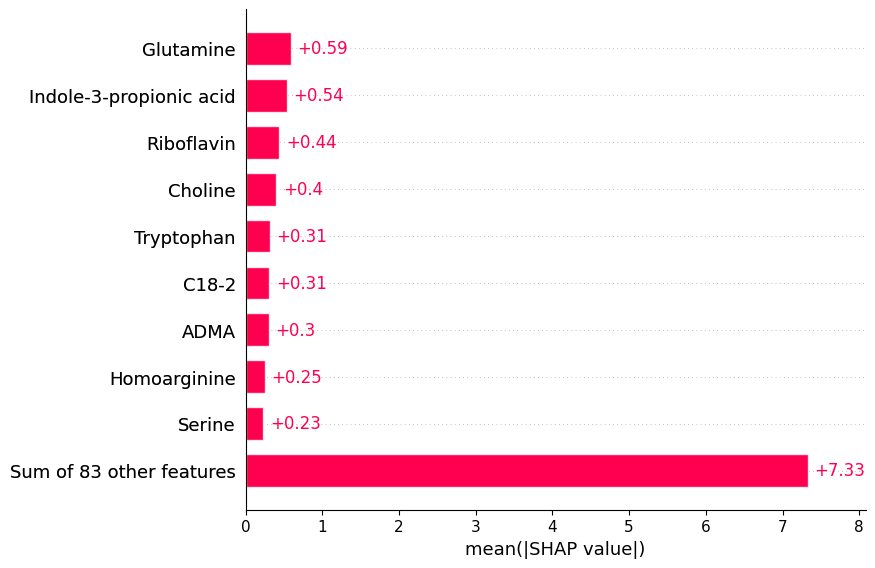

In [ ]:
explainer = shap.Explainer(GB)
shap_values = explainer(x_test)
shap.plots.bar(shap_values)

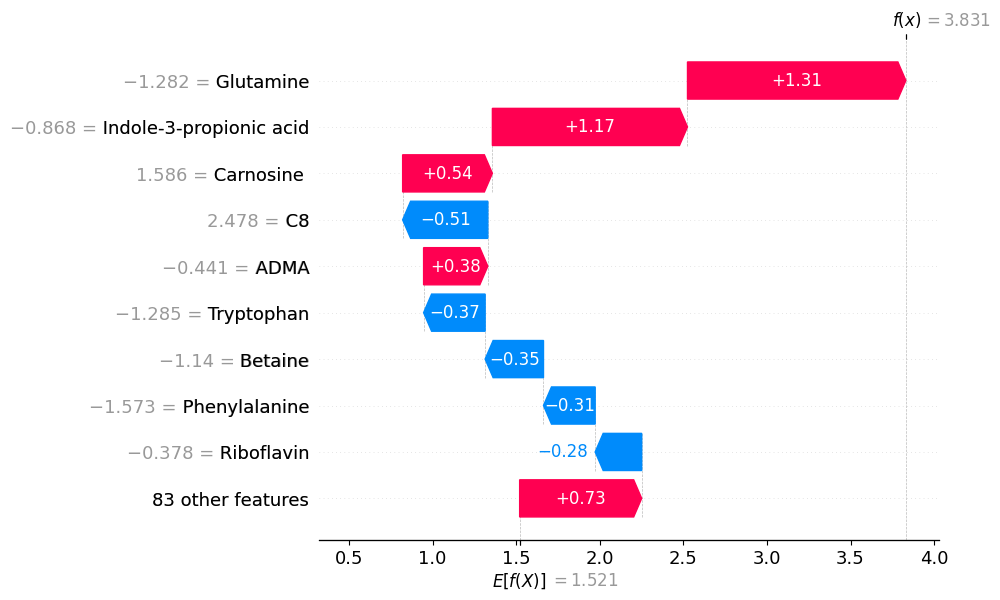

In [ ]:
shap.plots.waterfall(shap_values[0])